# CSCN8000 – Artificial Intelligence Algorithms and Mathematics – Winter 2024 _ Lab 2
## Fatimah Almusawi
## 9000400


Practical Part A 
Use the Lab2_dataset.csv provided. Your target in this part will be classify texts into Spam vs Not Spam using the Naive Bayes algorithms and comparing them to another type of classification model and comment on the results.

### Load the dataset

In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
lab2Datset=pd.read_csv('lab2_dataset.csv')
lab2Datset.head(20)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


### Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.

In [25]:
#Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lab2Datset['text'],lab2Datset['label'])
print(X.toarray())
#print(vectorizer.get_feature_names_out())
# Check the shape of the resulting feature matrix
print(X.shape)




[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5171, 50447)


### Split the dataset into training and testing

In [33]:
#SPLITTING THE DATA INTO TRAINING AND TESTING SETS

# Use 'label_num' as our target variable
y = lab2Datset['label_num']
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")





Training set size: 4136 samples
Testing set size: 1035 samples


### Model Training and Evaluation

- Train the Sklearn **RandomForestClassifier** model on the training dataset and evaluate on the test set

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed performance analysis
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9710
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.94      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035





The RandomForestClassifier has shown excellent performance on the test set with high accuracy, precision, recall, and F1-scores for both classes. This suggests that the model is well-suited for spam detection tasks, effectively identifying spam messages while minimizing false positives (not spam messages incorrectly classified as spam) and false negatives (spam messages not detected). The balance between precision and recall, especially in the context of spam detection, is crucial as it ensures that not many important (not spam) messages are mistakenly filtered out, and most spam messages are correctly identified and filtered.

### Gaussian Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline


# Initialize the Gaussian Naive Bayes classifier model
gnb = make_pipeline(MaxAbsScaler(), GaussianNB())

# Fit the model
gnb.fit(X_train.toarray(), y_train)  # Since GaussianNB expects continuous data, 
                                    #and CountVectorizer produces sparse matrix,
                                    # we might need to convert it to a dense array. 



# Predict on the test set
y_pred_gnb = gnb.predict(X_test.toarray())

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print(classification_report(y_test, y_pred_gnb))


Accuracy (GaussianNB): 0.9217
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       742
           1       0.86      0.87      0.86       293

    accuracy                           0.92      1035
   macro avg       0.90      0.91      0.90      1035
weighted avg       0.92      0.92      0.92      1035




The Gaussian Naive Bayes model performs well in distinguishing between spam and not spam emails, achieving about 92% accuracy. It is particularly good at recognizing emails that are not spam, but it also has a decent ability to identify spam emails. However, compared to the RandomForest model, it might more frequently mislabel emails, meaning it could sometimes wrongly identify regular emails as spam and miss some spam emails, treating them as regular emails. Overall, though it's not as precise as the RandomForestClassifier, it still offers a reliable way to filter out unwanted emails.

In [36]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)

# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Evaluate the model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy (MultinomialNB): {accuracy_mnb:.4f}")
print(classification_report(y_test, y_pred_mnb))


Accuracy (MultinomialNB): 0.9787
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



The Multinomial Naive Bayes classifier has shown excellent performance in classifying texts into spam and not spam, with the results indicating a high level of accuracy and balanced precision, recall, and F1-scores across both classes. Here's a 
The Multinomial Naive Bayes model does an excellent job at sorting emails, correctly figuring out which ones are spam and which ones are not spam 98% of the time. It's very reliable at identifying genuine emails correctly and is also great at spotting spam emails. This model makes very few mistakes, making it a highly effective tool for keeping unwanted spam out of your inbox while ensuring important emails are not mistakenly flagged as spam.

### Conclusion:<br>
The RandomForestClassifier and Multinomial Naive Bayes models both exhibit high accuracy in spam detection, with Multinomial Naive Bayes slightly outperforming RandomForest with a 97.87% accuracy compared to 97.10%, and both significantly surpassing the Gaussian Naive Bayes model's accuracy of 92.17%. While all three models are effective, the Multinomial Naive Bayes stands out for its exceptional balance of precision and recall, especially in identifying spam emails.

**Practical Part B ** <br>
Use the AB_NYC_2019.csv dataset for this part.
Tasks
•
Remove outliers based on price per night for a given apartment/home.
•
Compare the Z-score approach and the whiskers approach in terms of who is better to remove the outliers in this case.
The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities

### loading the data:

In [45]:
ab_nyc_df=pd.read_csv('AB_NYC_2019.csv')
ab_nyc_df.tail(5)
ab_nyc_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


After loading the data,the best think to do next,is visualazing the data . It helps us understand the distribution of our data, identify potential outliers visually, and decide on the most appropriate method for outlier detection and removal. Since we're focusing on the price variable in this task,i will make a histogram for the price variable.Looking for the shape of the distribution. Is it skewed? Are there long tails that might indicate outliers?

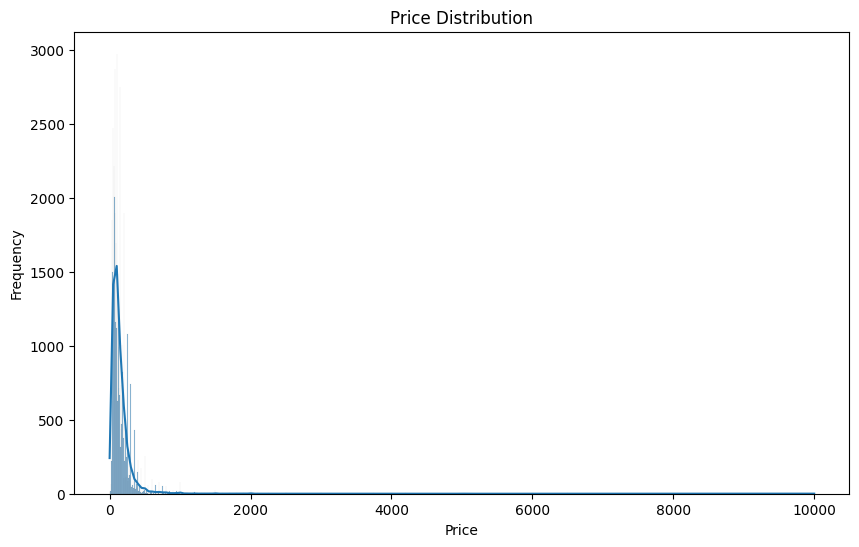

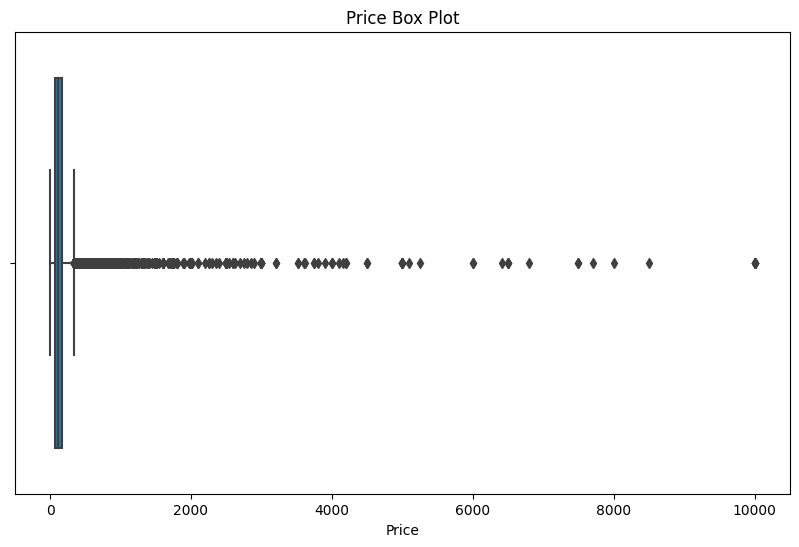

In [52]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(ab_nyc_df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ab_nyc_df['price'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


wow!!
It appears there are many outliers affecting the analysis. To gain more insight, let's check the minimum and maximum values for the price:

In [46]:
#getting the min and max price

min_price = ab_nyc_df['price'].min()
max_price = ab_nyc_df['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")


Minimum price: 0
Maximum price: 10000


From this data, we can understand that there is a wide range for the price, spanning from 0 to 10,000. The majority of the hotel rooms are priced below 1,000. There are a few of them priced between 1,000 and 10,000, which significantly skews the distribution away from normal. We can consider these as outliers.

### whiskers approach to handle outliers:

In [50]:
import pandas as pd

# Assuming df is your DataFrame and 'price' is the column of interest
Q1 = ab_nyc_df['price'].quantile(0.25)
Q3 = ab_nyc_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data
filtered_df1 = ab_nyc_df[(ab_nyc_df['price'] >= lower_bound) & (ab_nyc_df['price'] <= upper_bound)]
print(f"Number of outliers: {ab_nyc_df.shape[0] - filtered_df1.shape[0]}")

Number of outliers: 2972


now the IQR method to identify the outliers its seems to be reasonble. it detected a large numbers of outliers.its mean it is very sensetive to outliers. to compare it with the Zscore, its better to visualazing the filtered data after removing outliers with IQR to see the diffrences and give us a clear picture:

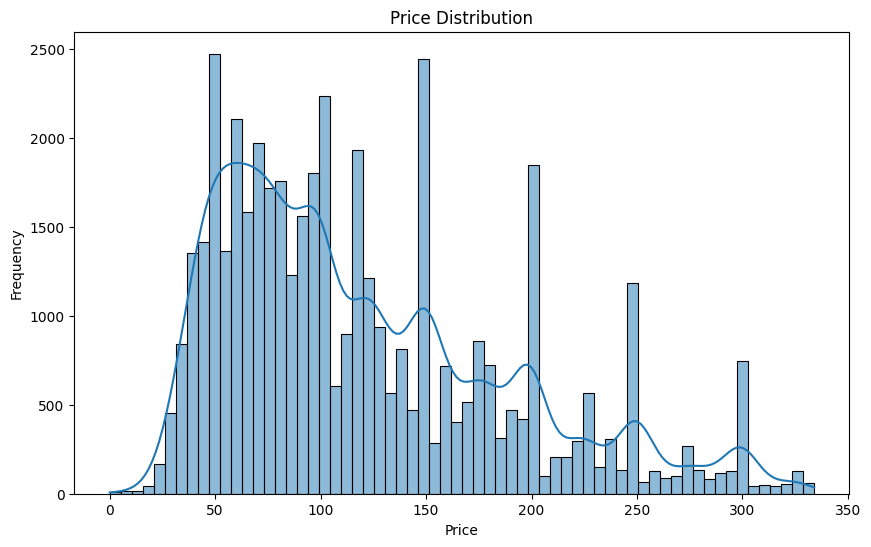

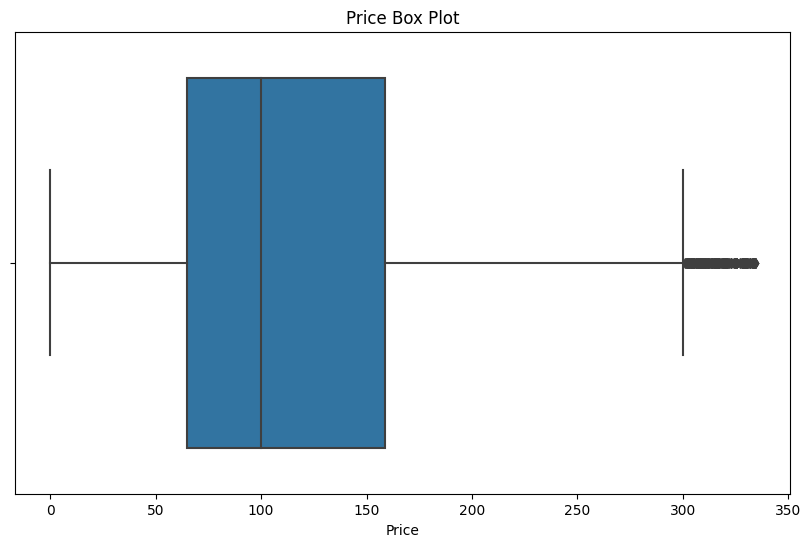

In [53]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df1['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df1['price'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()



"After plotting the filtered data, there is a noticeable and significant change compared to the plots before removing outliers, indicating that the Whisker approach (IQR method) is highly effective in this context. By removing 2972 outliers, the data now presents a clearer and more accurate representation of the underlying trends and patterns, which were previously obscured by extreme values. This cleaner dataset can lead to more reliable and valid statistical analyses, as it reduces the skewness and variability that outliers can cause. Moreover, the application of the IQR method has likely enhanced the performance of subsequent data modeling efforts, as models can now focus on the more representative core of the data without being misled by anomalous points. 

In [51]:
from scipy import stats
import numpy as np

# Assuming df is your DataFrame and 'price' is the column of interest
z_scores = np.abs(stats.zscore(ab_nyc_df['price']))
threshold = 3

# Filtering the data
filtered_df = ab_nyc_df[(z_scores < threshold)]
print(f"Number of outliers: {ab_nyc_df.shape[0] - filtered_df.shape[0]}")

Number of outliers: 388


Using the Z-score method with a threshold of 3 to identify outliers , resulted in 388 outliers being detected. lets visual it to get clearer picture:

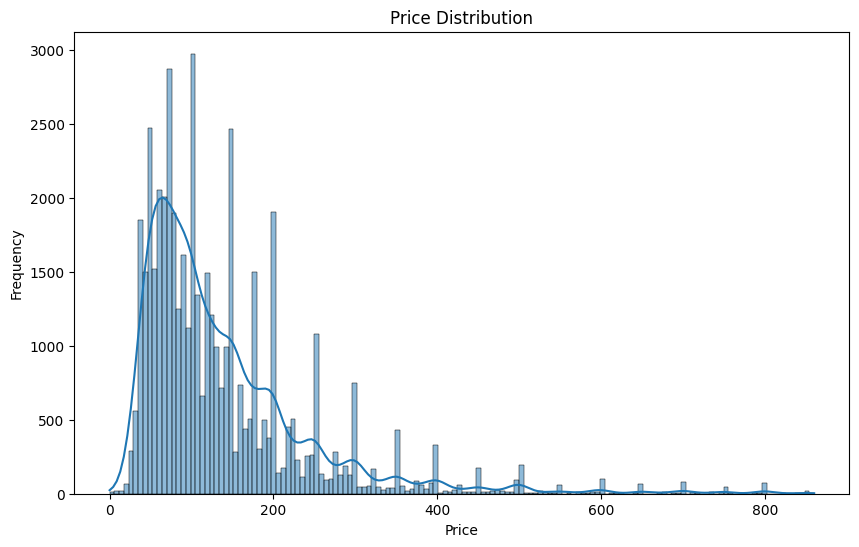

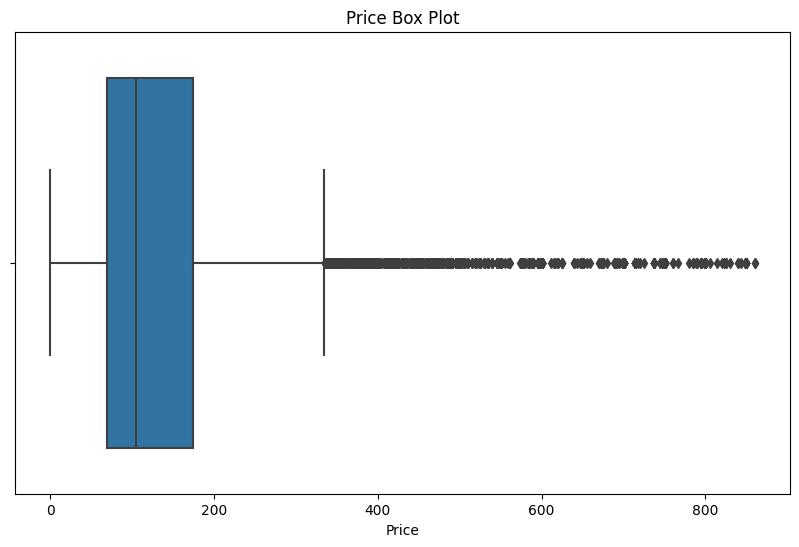

In [54]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['price'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


the polts shows that there are less outliers here but still the data are not clear as with IQR

### Conclusion:<br>
Comparing the two methods, the IQR approach identified significantly more outliers (2972) than the Z-score method (388), indicating that the IQR method is more sensitive to variations in the dataset. While the Z-score approach focuses on deviations from the mean, potentially keeping more data points that are closer to the central tendency, the IQR method effectively captures a broader range of outliers by considering the spread of the middle 50% of the data. This suggests that the choice between these methods should be guided by the specific analytical goals and the nature of the dataset, with the IQR method being preferable for a more aggressive outlier removal strategy.